In [4]:
%matplotlib inline

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [7]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))
                               ])

trainset = datasets.MNIST('./MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


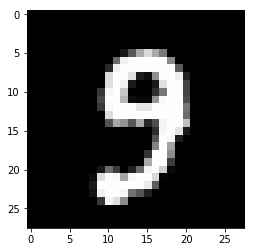

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [13]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
print(out.shape)

torch.Size([64, 10])


In [30]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

prob = softmax(out)
print(prob.shape)
expec = torch.sum(prob, dim = 1)
print(expec.shape)
print(expec)

torch.Size([64, 10])
torch.Size([64])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
